In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import datetime as dt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite?check_same_thread=False")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

engine.execute('SELECT * FROM measurement LIMIT 500').fetchall()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [11]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    
engine.execute('SELECT * FROM station LIMIT 30').fetchall()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

2017-08-23
2016-08-23


<function matplotlib.pyplot.show(*args, **kw)>

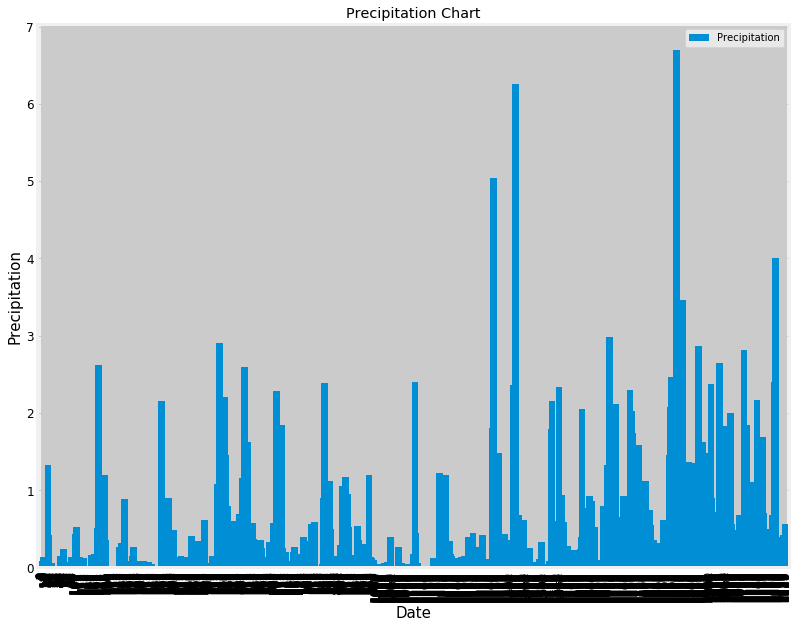

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

list_precip = []
list_date  =[]

# Calculate the date 1 year ago from the last data point in the database
#GETTING THE LAST DATA POINT FIRST
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(latest_date)

#GETTING THE DATA WHICH IS 1 YEAR OLD.
get_start_date = dt.datetime.strptime(latest_date, '%Y-%m-%d').date() - dt.timedelta(days=365)

#tempDt =dt.date(latest_date) - dt.timedelta(days=365)
print(get_start_date)
#print(tempDt)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= get_start_date).all()
precip_data

for record in precip_data:
    list_precip.append(record.prcp)
    list_date.append(record.date)

    
# Put data into dataframe
prcp_df = pd.DataFrame(precip_data,columns=['Date', 'Precipitation'])
#prcp_df.sort_values(by='Date', ascending=False)
prcp_df.set_index('Date')
prcp_df.head()

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the dat

ax = prcp_df.plot(kind='bar', title ="Precipitation Chart",width=20 ,figsize=(12,10),legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=15)
ax.set_ylabel("Precipitation",fontsize=15)
plt.savefig("Precipitation.png")
plt.show


![precipitation](Images/precipitation.png)

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [14]:
# Design a query to show how many stations are available in this dataset?
total_count = session.query(Station).count()
print(total_count)





9


In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_station = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
active_station
#for station in active_station:
#    (m,s) = record
#    print(m.station)
#   print(s.station)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).limit(1).all()


lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).limit(1).all()



average_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).limit(1).all()

print(average_temp) 
print(lowest_temp)
print(highest_temp)

best_station = average_temp[0][0]
best_station

[('USC00519281', 71.66378066378067)]
[('USC00519281', 54.0)]
[('USC00519281', 85.0)]


'USC00519281'

In [17]:

# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#best_station = session.query(Measurement.station,func.count(Measurement.tobs)).filter(Measurement.date >= get_start_date).group_by(Measurement.station).\
#             order_by(func.count(Measurement.station).desc()).all()
#best_station


NameError: name 'order_by' is not defined

In [18]:
temp_obs_data = session.query(Measurement.station, Measurement.tobs).\
            filter(Measurement.date >= get_start_date).\
            filter(Measurement.station== best_station).all()
      
temp_obs_data

    
# Put data into dataframe
temp_obs_data_df = pd.DataFrame(temp_obs_data,columns=['station', 'Frequency'])
temp_obs_data_df.sort_values(by='station', ascending=False)
temp_obs_data_df.head()




,station,Frequency
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


<function matplotlib.pyplot.show(*args, **kw)>

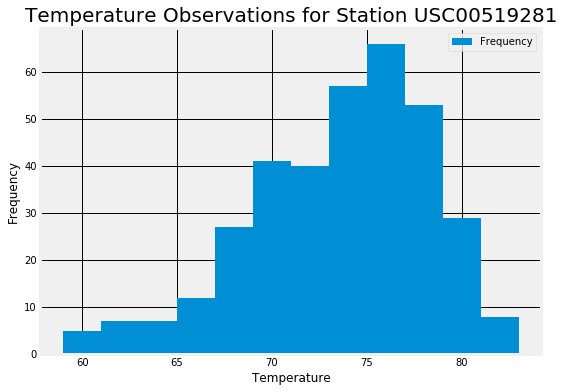

In [19]:
temp_obs_data_df.plot.hist(by='station', bins=12, figsize=(8,6),legend = True,grid =True)

plt.title("Temperature Observations for Station " + best_station, fontsize=20)
plt.xlabel("Temperature", fontsize=12)
plt.savefig("StationTemps.png")
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.show

![precipitation](Images/station-histogram.png)

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# abc=dt.date(2018, 1, 1) - dt.timedelta(days=365)
#END dtae
#dt.date(2018, 1, 7) - dt.timedelta(days=365)
#abc.strftime("%Y-%m-%d")
trip_start = dt.date(2018, 1, 1)
trip_end = dt.date(2018, 1, 7)
year_old = dt.timedelta(days=365)
calc_temp_data = (calc_temps((trip_start-year_old), (trip_end-year_old)))
print(calc_temp_data)


[(62.0, 68.36585365853658, 74.0)]


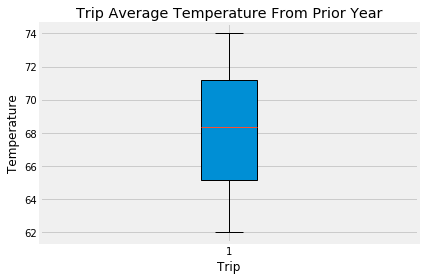

In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
x = range(len(calc_temp_data))
ax.boxplot(calc_temp_data, patch_artist=True)
ax.set_title('Trip Avg Temp')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
